In [1]:
%matplotlib inline

import os
import json
import numpy as np
from alignedpitchfilter import alignedpitchfilter
import matplotlib.pyplot as plt


In [2]:
examplefolder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(examplefolder, 'pitch.json')
alignednotefile = os.path.join(examplefolder, 'alignedNotes.json')

savepitchfile = os.path.join(examplefolder, 'pitch_corrected.json')

In [3]:
# load the data
pitch = np.array(json.load(open(pitchfile, 'r')))
notes = json.load(open(alignednotefile, 'r'))['notes']


In [4]:
pitch_corrected, synth_pitch = alignedpitchfilter.correctOctaveErrors(pitch, notes)
json.dump(pitch_corrected.tolist(), open(savepitchfile, 'w'))


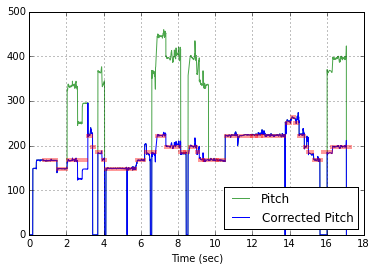

In [5]:
fig, ax = plt.subplots()
ax.plot(pitch[:,0], pitch[:,1], 'g', label='Pitch', alpha = 0.7)
ax.plot(pitch_corrected[:,0], pitch_corrected[:,1], 'b', label='Corrected Pitch')

plt.xlabel('Time (sec)')
plt.grid(True)

for note in notes:
    ax.plot(note['Interval'], [note['Pitch']['Value'], note['Pitch']['Value']], 
            'r', alpha=0.4, linewidth=4) 
    
legend = ax.legend(loc='lower right') 
plt.show()